In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pickle
import pandas as pd

In [2]:
higgs_file = open ("higgs_100000_pt_250_500.pkl", 'rb')
qcd_file = open ("qcd_100000_pt_250_500.pkl", 'rb')

# QCD is background, Higgs is signal
qcd = pickle.load(qcd_file)
higgs = pickle.load(higgs_file)


print("pt = Transverse Momentum")
print("eta = Pseudo Rapidity")
print("phi = Azimuthal Angle")
print("mass = Mass")
print("ee2 = Energy Correlation Function 2")
print("ee3 = Energy Correlation Function 3")
print("d2 = Energy Correlation Function")
print("angularity = Jet broadness to thrust ratio")
print("t1 = subjettiness of degree 1")
print("t2 = subjettiness of degree 2") 
print("t3 = subjettiness of degree 3")
print("t21 = ratio of t2/t1")
print("t32 = ratio of t3/t2")
print("KtDeltaR = Delta R of two subjets within large-R jet")

pt = Transverse Momentum
eta = Pseudo Rapidity
phi = Azimuthal Angle
mass = Mass
ee2 = Energy Correlation Function 2
ee3 = Energy Correlation Function 3
d2 = Energy Correlation Function
angularity = Jet broadness to thrust ratio
t1 = subjettiness of degree 1
t2 = subjettiness of degree 2
t3 = subjettiness of degree 3
t21 = ratio of t2/t1
t32 = ratio of t3/t2
KtDeltaR = Delta R of two subjets within large-R jet


Above is a translation of the name of the data inside the dataset to what it represents. From this point on these may be used interchangeably in descriptions and labels. Anytime "QCD" is used (as in the name of the dataset), it refers to the simulation data. Anytime "Higgs" is used it refers to the pseudo-experiment data.

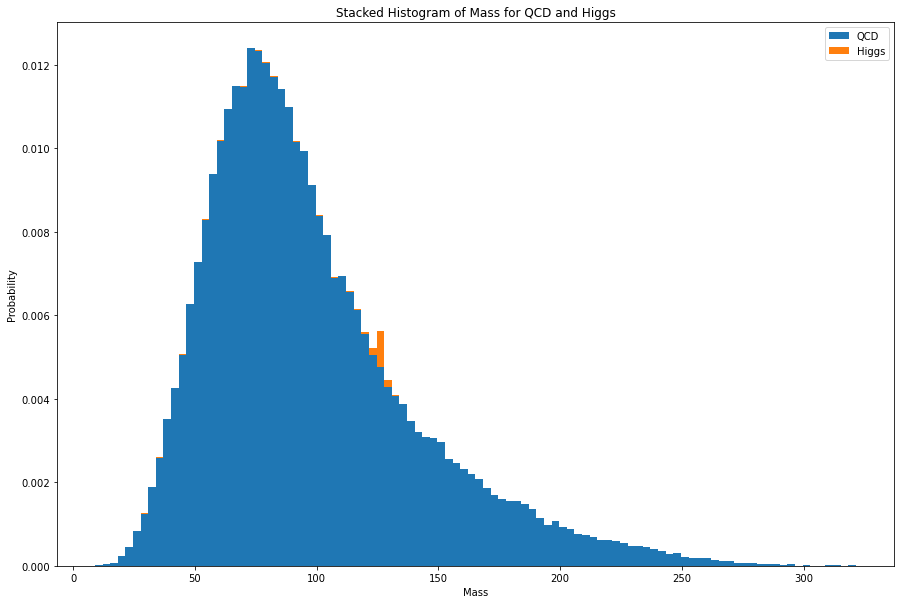

In [3]:
n_higgs = 100 / 100000
n_qcd = 20000 / 100000

fig, ax = plt.subplots(1, 1, figsize = (15, 10))

qcd_weight = np.array([n_qcd] * len(qcd['mass']))
higgs_weight = np.array([n_higgs] * len(higgs['mass']))

ax.hist([qcd['mass'], higgs['mass']], bins = 100, density = True, stacked = True, weights = [qcd_weight, higgs_weight])

ax.legend(["QCD", "Higgs"])
ax.set_title("Stacked Histogram of Mass for QCD and Higgs")
ax.set_xlabel("Mass")
ax.set_ylabel("Probability")

plt.show()

In [4]:
n_higgs = 100 / 100000
n_qcd = 20000 / 100000

exp_prob = stats.poisson.cdf(n_higgs + n_qcd, n_qcd, loc = 0)
exp_sig = stats.norm.ppf(exp_prob)

approx_sig = n_higgs / np.sqrt(n_qcd)

print("The expected significance of the Higgs Boson is " + str(exp_sig) + ". The approximation is " + str(approx_sig) + ".")

The expected significance of the Higgs Boson is 0.9105386773865511. The approximation is 0.00223606797749979.


# Cuts

In [5]:
bin_size = 33
upper_val = 330

hist_qcd = ax.hist(qcd['mass'], bins = bin_size, density = False, weights = [qcd_weight], range = (0, upper_val))
hist_higgs = ax.hist(higgs['mass'], bins = bin_size, density = False, weights = [higgs_weight], range = (0, upper_val))

cut_sigs = []
for i in range(bin_size):
    n_qcd = hist_qcd[0][i]
    n_higgs = hist_higgs[0][i]
    sig = stats.norm.ppf(stats.poisson.cdf(n_higgs + n_qcd, n_qcd, loc = 0))
    cut_sigs.append(sig)
    
index_max = cut_sigs.index(max(cut_sigs))
print("Optimal cut is between " + str(hist_qcd[1][index_max]) + " and " + str(hist_qcd[1][index_max] + (upper_val / bin_size)) + " with an expected significance of " + str(cut_sigs[index_max]))

Optimal cut is between 120.0 and 130.0 with an expected significance of 2.4116886489260785


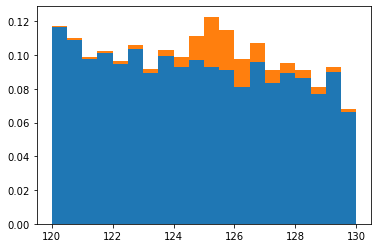

In [6]:
fig, ax = plt.subplots(1, 1)

ax.hist([qcd['mass'], higgs['mass']], bins = 20, density = True, stacked = True, weights = [qcd_weight, higgs_weight], range = (120, 130))
plt.show()

# Other Cuts

For pt, the optimal cut is between 475.0123663250928 and 500.01235833562953 with an expected significance of 0.7225826401138794
For eta, the optimal cut is between -0.3454629814164307 and -0.18583283651390878 with an expected significance of 0.31306741330895566
For phi, the optimal cut is between -0.3141378576900795 and -0.15705925482086408 with an expected significance of 0.18020548945921394
For ee2, the optimal cut is between 0.12577966743630484 and 0.1505768429923671 with an expected significance of 1.0618934525932457
For ee3, the optimal cut is between 0.087205568904505 and 0.09301926282048234 with an expected significance of 0.9105386773865511
For d2, the optimal cut is between 55.762713360311245 and 60.8205414238128 with an expected significance of 0.9105386773865511
For angularity, the optimal cut is between 0.04824169256057458 and 0.05092178336771358 with an expected significance of 0.9105386773865511
For t1, the optimal cut is between 3.0544446806406595 and 3.2515307216490683 

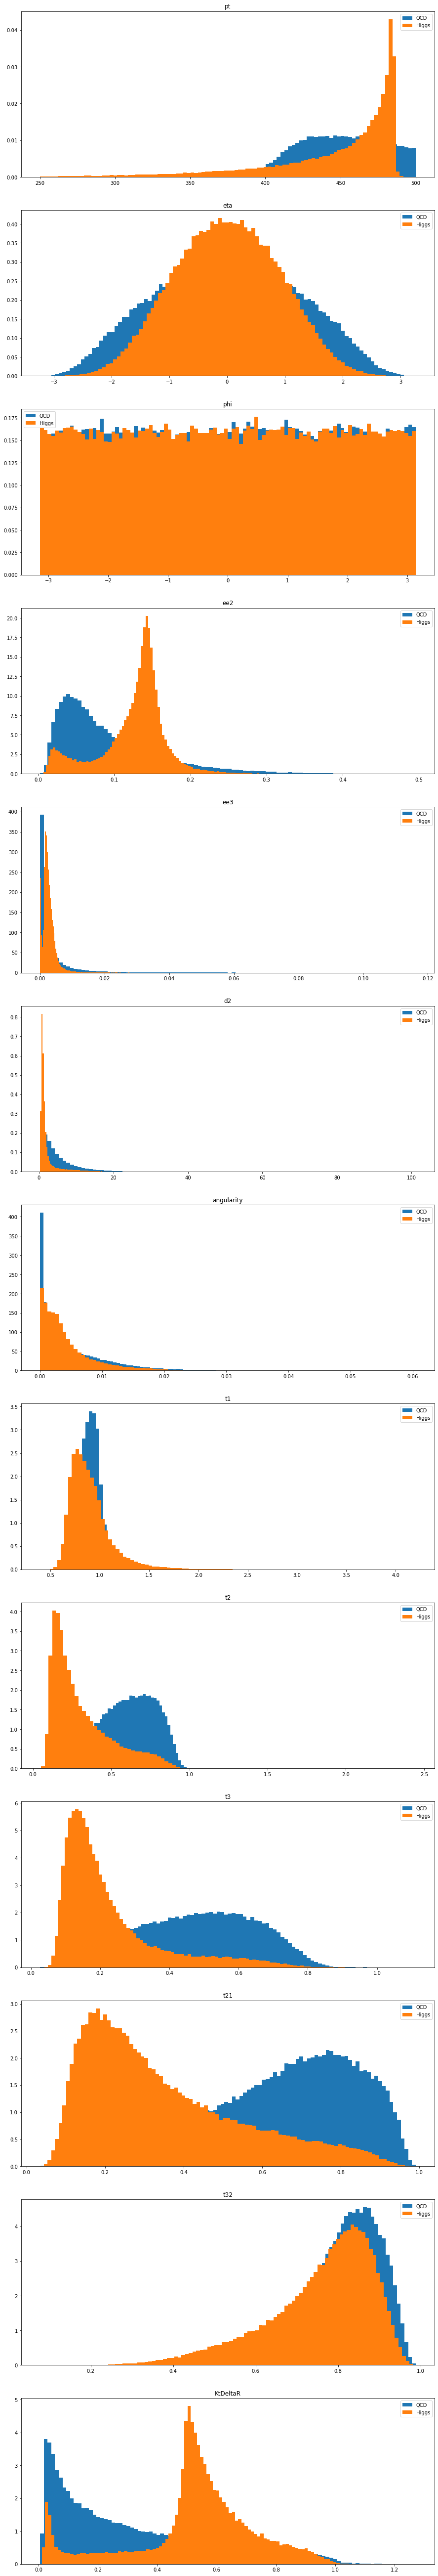

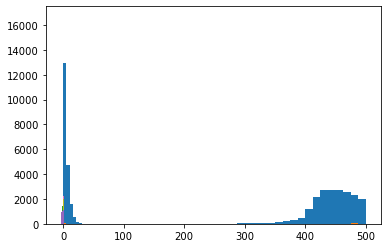

In [7]:
n_higgs = 100 / 100000
n_qcd = 20000 / 100000

fig, ax = plt.subplots(13, 1, figsize = (15, 95))
fig2, ax2 = plt.subplots(1,1)

j = 0
for key in qcd:
    if key != 'mass':
        # For graphing
        n_higgs = 100 / 100000
        n_qcd = 20000 / 100000
        
        qcd_weight = np.array([n_qcd] * len(qcd[key]))
        higgs_weight = np.array([n_higgs] * len(higgs[key]))

#         ax[j].hist([qcd[key], higgs[key]], bins = 100, density = True, stacked = True, weights = [qcd_weight, higgs_weight])
        ax[j].hist(qcd[key], bins = 100, density = True)
        ax[j].hist(higgs[key], bins = 100, density = True)
        ax[j].set_title(key)
        ax[j].legend(["QCD", "Higgs"])
        
        # For cuts
        bin_size = 20

        lower_val = qcd[key].min()
        upper_val = qcd[key].max()

        hist_qcd = ax2.hist(qcd[key], bins = bin_size, density = False, weights = [qcd_weight], range = (lower_val, upper_val))
        hist_higgs = ax2.hist(higgs[key], bins = bin_size, density = False, weights = [higgs_weight], range = (lower_val, upper_val))

        cut_sigs = []
        for i in range(bin_size):
            n_qcd = hist_qcd[0][i]
            n_higgs = hist_higgs[0][i]
            sig = stats.norm.ppf(stats.poisson.cdf(n_higgs + n_qcd, n_qcd, loc = 0))
            if sig != float('inf'):
                cut_sigs.append(sig)
        if len(cut_sigs) > 0:
            index_max = cut_sigs.index(max(cut_sigs, key = abs))
            print("For " + key + ", the optimal cut is between " + str(hist_qcd[1][index_max]) + " and " + str(hist_qcd[1][index_max] + (upper_val / bin_size)) + " with an expected significance of " + str(cut_sigs[index_max]))
        else:
            print("None for " + key)
        
        j = j + 1

plt.show()

pt with equally sized bins:
For pt, the optimal cut is between 472.2359803377992 and 486.11791027426705 with an expected significance of 0.7560595953261303.
[18, 0.7560595953261303, 16]
 --------------- 
eta with equally sized bins:
For eta, the optimal cut is between -1.0959618043336454 and 1.0483205468583972 with an expected significance of 0.7116877761437944.
[3, 0.7116877761437944, 1]
 --------------- 
phi with equally sized bins:
For phi there is no optimal cut. Expected significance over full range is 0.7041666185570017.
[1, 0.7041666185570017, 0]
 --------------- 
mass with equally sized bins:
For mass, the optimal cut is between 124.27893475850834 and 127.56425239921401 with an expected significance of 3.096923101184199.
[95, 3.096923101184199, 35]
 --------------- 
ee2 with equally sized bins:
For ee2, the optimal cut is between 0.1257796674363048 and 0.16690898340129817 with an expected significance of 1.1864244073469965.
[12, 1.1864244073469965, 3]
 --------------- 
ee3 with

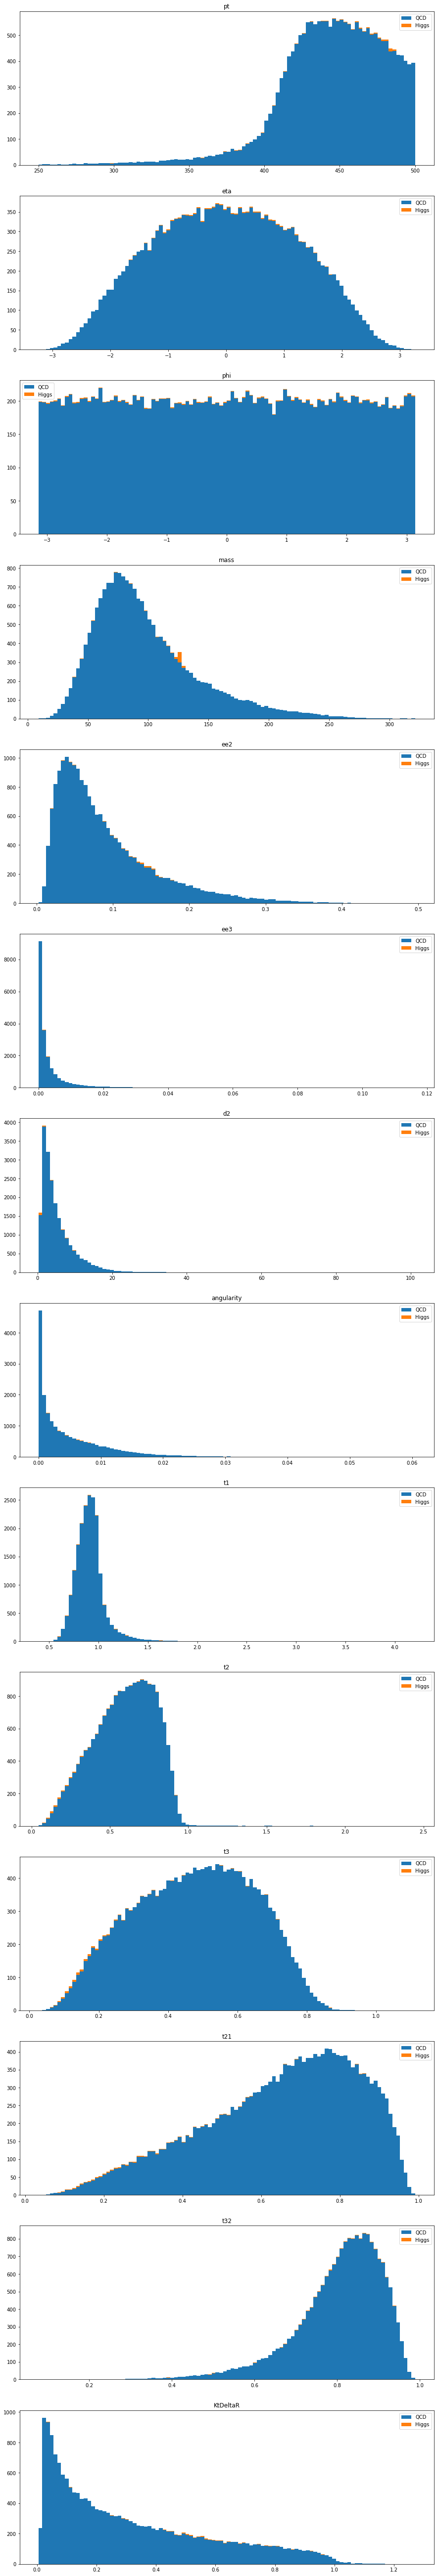

In [8]:
n_higgs = 100 / 100000
n_qcd = 20000 / 100000

fig, ax = plt.subplots(14, 1, figsize = (15, 95))
fig2, ax2 = plt.subplots(1,1)

j = 0
for key in qcd:
    print(key + " with equally sized bins:")
    n_higgs = 100 / 100000
    n_qcd = 20000 / 100000
    qcd_weight = np.array([n_qcd] * len(qcd[key]))
    higgs_weight = np.array([n_higgs] * len(higgs[key]))

#     For graphing
    ax[j].hist([qcd[key], higgs[key]], bins = 100, density = False, stacked = True, weights = [qcd_weight, higgs_weight])
#     ax[j].hist(qcd[key], bins = 100, density = True, weights = qcd_weight)
#     ax[j].hist(higgs[key], bins = 100, density = True, weights = higgs_weight)
    ax[j].set_title(key)
    ax[j].legend(["QCD", "Higgs"])

    # For cuts
    max_array = []
    for bin_num in range(1, 101, 1):

        lower_val = qcd[key].min()
        upper_val = qcd[key].max()

        hist_qcd = ax2.hist(qcd[key], bins = bin_num, density = False, weights = [qcd_weight], range = (lower_val, upper_val))
        hist_higgs = ax2.hist(higgs[key], bins = bin_num, density = False, weights = [higgs_weight], range = (lower_val, upper_val))

        cut_sigs = []
        for i in range(bin_num):
            n_qcd = hist_qcd[0][i]
            n_higgs = hist_higgs[0][i]
            sig = stats.norm.ppf(stats.poisson.cdf(n_higgs + n_qcd, n_qcd, loc = 0))
            if sig != float('inf'):
                cut_sigs.append(sig)
            elif sig == float('inf'):
                cut_sigs.append(0)

        index_max = cut_sigs.index(max(cut_sigs, key = abs))
        max_array.append([bin_num, cut_sigs[index_max], index_max])

    max_sig = max_array[0][1]
    ind = 0
    for k in range(len(max_array)):
        if abs(max_array[k][1]) > abs(max_sig):
            max_sig = max_array[k][1]
            ind = k

    bottom_val = lower_val + max_array[ind][2] * ((upper_val - lower_val) / max_array[ind][0])
    top_val = bottom_val + ((upper_val - lower_val) / max_array[ind][0])
    if max_array[ind][0] == 1:
        print("For " + key + " there is no optimal cut. Expected significance over full range is " + str(max_array[ind][1]) + ".")
    else:    
        print("For " + key + ", the optimal cut is between " + str(bottom_val) + " and " + str(top_val) + " with an expected significance of " + str(max_array[ind][1]) + ".")
    print(max_array[ind])
    print(" --------------- ")

    j = j + 1
    
plt.close()

In [9]:
fig, ax = plt.subplots(1, 1)

for key in qcd:
    print(key + " from bottom up:")
    
    n_higgs = 100 / 100000
    n_qcd = 20000 / 100000

    lower_val = qcd[key].min()
    upper_val = qcd[key].max()

    hist_qcd = ax.hist(qcd[key], bins = 100, density = False, weights = [qcd_weight], range = (lower_val, upper_val))
    hist_higgs = ax.hist(higgs[key], bins = 100, density = False, weights = [higgs_weight], range = (lower_val, upper_val))

    cut_sigs = []
    for i in range(100):
        n_qcd = np.sum(hist_qcd[0][0:i])
        n_higgs = np.sum(hist_higgs[0][0:i])
        sig = stats.norm.ppf(stats.poisson.cdf(n_higgs + n_qcd, n_qcd, loc = 0))
        if sig != float('inf'):
            cut_sigs.append(sig)

    index_max = cut_sigs.index(max(cut_sigs))

    print("Optimal cut is between " + str(lower_val) + " and " + str(((index_max + 1) * ((upper_val - lower_val) / 100)) + lower_val) + " with an expected significance of " + str(cut_sigs[index_max]))
    
plt.close()

pt from bottom up:
Optimal cut is between 250.12510135431387 and 487.50610326791383 with an expected significance of 0.7472453236965926
eta from bottom up:
Optimal cut is between -3.240244155525688 and 1.4557341935848847 with an expected significance of 0.7253808167305906
phi from bottom up:
Optimal cut is between -3.1415368791145792 and 3.015909878654331 with an expected significance of 0.7016350358888966
mass from bottom up:
Optimal cut is between 9.292817333809852 and 134.13488768062538 with an expected significance of 0.7818334989124891
ee2 from bottom up:
Optimal cut is between 0.0023917195413247693 and 0.22449002575228885 with an expected significance of 0.7227321293227505
ee3 from bottom up:
Optimal cut is between 6.406593797149574e-07 and 0.006977034918989738 with an expected significance of 0.7394035709859783
d2 from bottom up:
Optimal cut is between 0.2813436928759825 and 1.2900958686475326 with an expected significance of 1.49303508981238
angularity from bottom up:
Optimal c

In [10]:
fig, ax = plt.subplots(1, 1)

for key in qcd:
    print(key + " from top down:")
    
    n_higgs = 100
    n_qcd = 20000

    lower_val = qcd[key].min()
    upper_val = qcd[key].max()
    
    hist_qcd = ax.hist(qcd[key], bins = 100, density = False, weights = [qcd_weight], range = (lower_val, upper_val))
    hist_higgs = ax.hist(higgs[key], bins = 100, density = False, weights = [higgs_weight], range = (lower_val, upper_val))

    cut_sigs = []
    for i in range(100):
        n_qcd = np.sum(hist_qcd[0][100-i:i])
        n_higgs = np.sum(hist_higgs[0][100-i:i])
        sig = stats.norm.ppf(stats.poisson.cdf(n_higgs + n_qcd, n_qcd, loc = 0))
        if sig != float('inf'):
            cut_sigs.append(sig)
        elif sig == float('inf'):
            cut_sigs.append(0)

    index_max = cut_sigs.index(max(cut_sigs))

    print("Optimal cut is between " + str(((index_max + 1) * ((upper_val - lower_val) / 100) + lower_val)) + " and " + str(upper_val) + " with an expected significance of " + str(cut_sigs[index_max]))
    
plt.close()

pt from top down:
Optimal cut is between 490.004850656478 and 499.9998402107349 with an expected significance of 0.7430338076891584
eta from top down:
Optimal cut is between 1.5200626641206458 and 3.192602898050439 with an expected significance of 0.7458517655389812
phi from top down:
Optimal cut is between 3.1415720573843084 and 3.1415720573843084 with an expected significance of 0.7014205128238309
mass from top down:
Optimal cut is between 215.28223340605547 and 321.39799320084865 with an expected significance of 1.1821674315848854
ee2 from top down:
Optimal cut is between 0.3972331528052609 and 0.49594351112124496 with an expected significance of 1.000681706348732
ee3 from top down:
Optimal cut is between 0.11627387831954676 and 0.11627387831954676 with an expected significance of 0.8259415527258129
d2 from top down:
Optimal cut is between 54.75396118453969 and 101.15656127003099 with an expected significance of 0.9105386773865511
angularity from top down:
Optimal cut is between 0.0

In [11]:
fig, ax = plt.subplots(1, 1)

for key in qcd:
    print(key + " around maximum of Higgs graph:")
    
    n_higgs = 100 / 100000
    n_qcd = 20000 / 100000
    
    lower_val = higgs[key].min()
    upper_val = higgs[key].max()

    hist_higgs = ax.hist(higgs[key], bins = 100, density = False, weights = [higgs_weight], range = (lower_val, upper_val))
    

    
    higgs_ind = np.argmax(hist_higgs[0])
    max_higgs = hist_higgs[1][higgs_ind]
    
#     print(higgs_ind, hist_higgs[1][higgs_ind])
    
    div_size = (upper_val - lower_val) / 40
#     print(upper_val, lower_val, div_size, max_higgs)
    
    higgs_sorted = np.sort(higgs[key])
    qcd_sorted = np.sort(qcd[key])
    
    max_ind = 0
    for i in range(len(higgs_sorted)):
        if higgs_sorted[i] >= max_higgs:
            max_ind = i
            break
    
    cut_sigs = []
    
    for j in range(1, 21, 1):
        higgs_count = 0
        qcd_count = 0
        
#         if max_higgs + 
#         For above- if greater than upper_val use upper_val or something
        for i in range(len(higgs_sorted)):
            if(higgs_sorted[i] >= (max_higgs - (j * div_size)) and higgs_sorted[i] <= (max_higgs + (j * div_size))):
                higgs_count = higgs_count + 1
            if(qcd_sorted[i] >= (max_higgs - (j * div_size)) and higgs_sorted[i] <= (max_higgs + (j * div_size))):
                qcd_count = qcd_count + 1
                
#         print(higgs_count, qcd_count)
        scaled_higgs_count = higgs_count * n_higgs
        scaled_qcd_count = qcd_count * n_qcd
        
        sig = stats.norm.ppf(stats.poisson.cdf(scaled_higgs_count + scaled_qcd_count, scaled_qcd_count, loc = 0))
        if sig != float('inf'):
            cut_sigs.append(sig)
        
    print(max(cut_sigs), cut_sigs.index(max(cut_sigs)))
    print("Maximum significance of " + str(max(cut_sigs)) + " in interval of " + str(max_higgs - ((cut_sigs.index(max(cut_sigs)) + 1) * div_size)) + " to " + str(max_higgs + ((cut_sigs.index(max(cut_sigs)) + 1) * div_size)))

    
    print("----------------")
plt.close()

pt around maximum of Higgs graph:
0.6682112417013065 19
Maximum significance of 0.6682112417013065 in interval of 359.934703839409 to 604.0633820432997
----------------
eta around maximum of Higgs graph:
0.7114558422253845 14
Maximum significance of 0.7114558422253845 in interval of -2.5879044152730506 to 2.261901479965556
----------------
phi around maximum of Higgs graph:
0.6800786929469855 19
Maximum significance of 0.6800786929469855 in interval of -2.7017744810397244 to 3.581256299522592
----------------
mass around maximum of Higgs graph:
1.213390259818308 0
Maximum significance of 1.213390259818308 in interval of 121.75200739143573 to 128.4254266754683
----------------
ee2 around maximum of Higgs graph:
1.3099317249725373 0
Maximum significance of 1.3099317249725373 in interval of 0.13321157663146804 to 0.14880090889512632
----------------
ee3 around maximum of Higgs graph:
0.709067946555615 18
Maximum significance of 0.709067946555615 in interval of -0.012765209044514229 to 0.0

Optimal cut for pt is between 481.2592347965033 and 493.75923080177165 with an expected significance of 1.575399923659908
----------------------
Optimal cut for eta is between -0.18464180507702732 and -0.10482673262576635 with an expected significance of 0.49022483514864484
----------------------
Optimal cut for phi is between 1.5707948232595865 and 1.6493341246941942 with an expected significance of 0.31376674398092946
----------------------
Optimal cut for ee2 is between 0.13811846222580285 and 0.15051705000383397 with an expected significance of 1.148168111581741
----------------------
Optimal cut for ee3 is between 6.406593797149574e-07 and 0.002907487617368384 with an expected significance of 2.8338601176070837
----------------------
Optimal cut for d2 is between 0.2813436928759825 and 2.8102577246267573 with an expected significance of 1.8528394941614756
----------------------
Optimal cut for angularity is between 0.0013406112162771412 and 0.002680656619846641 with an expected si

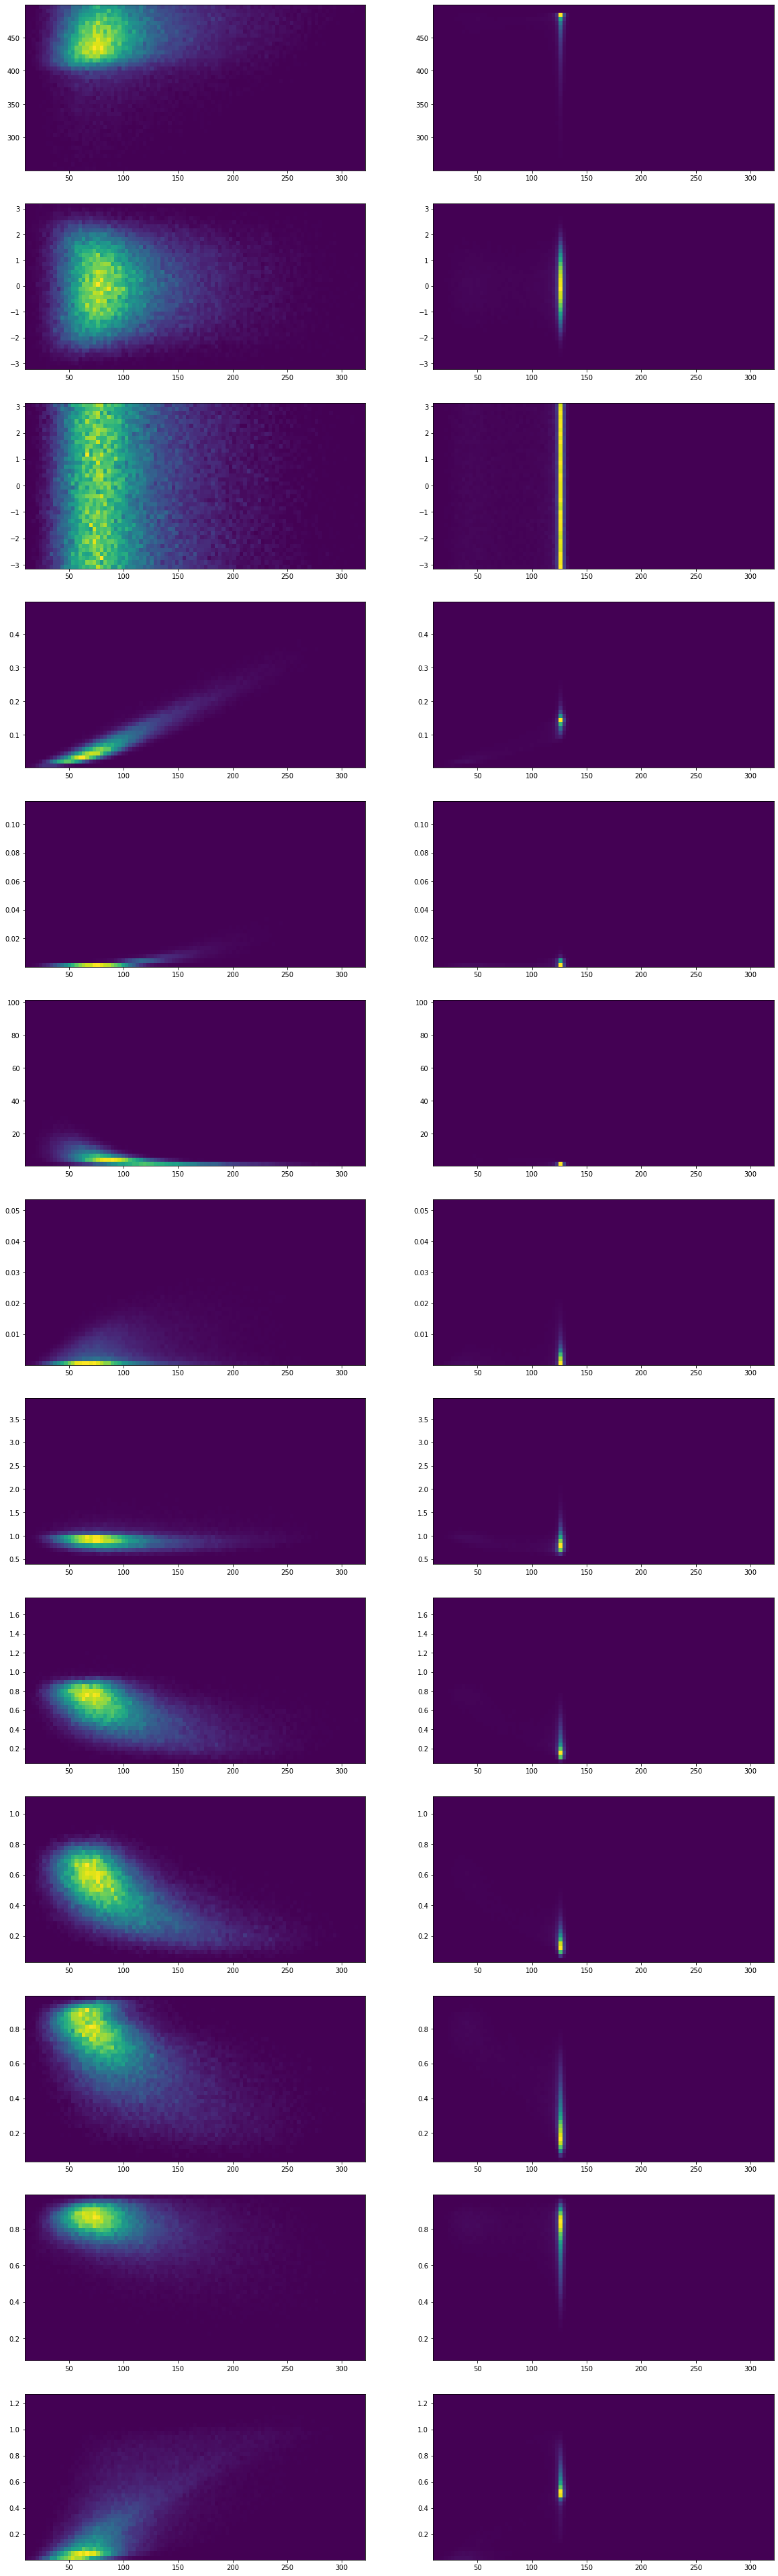

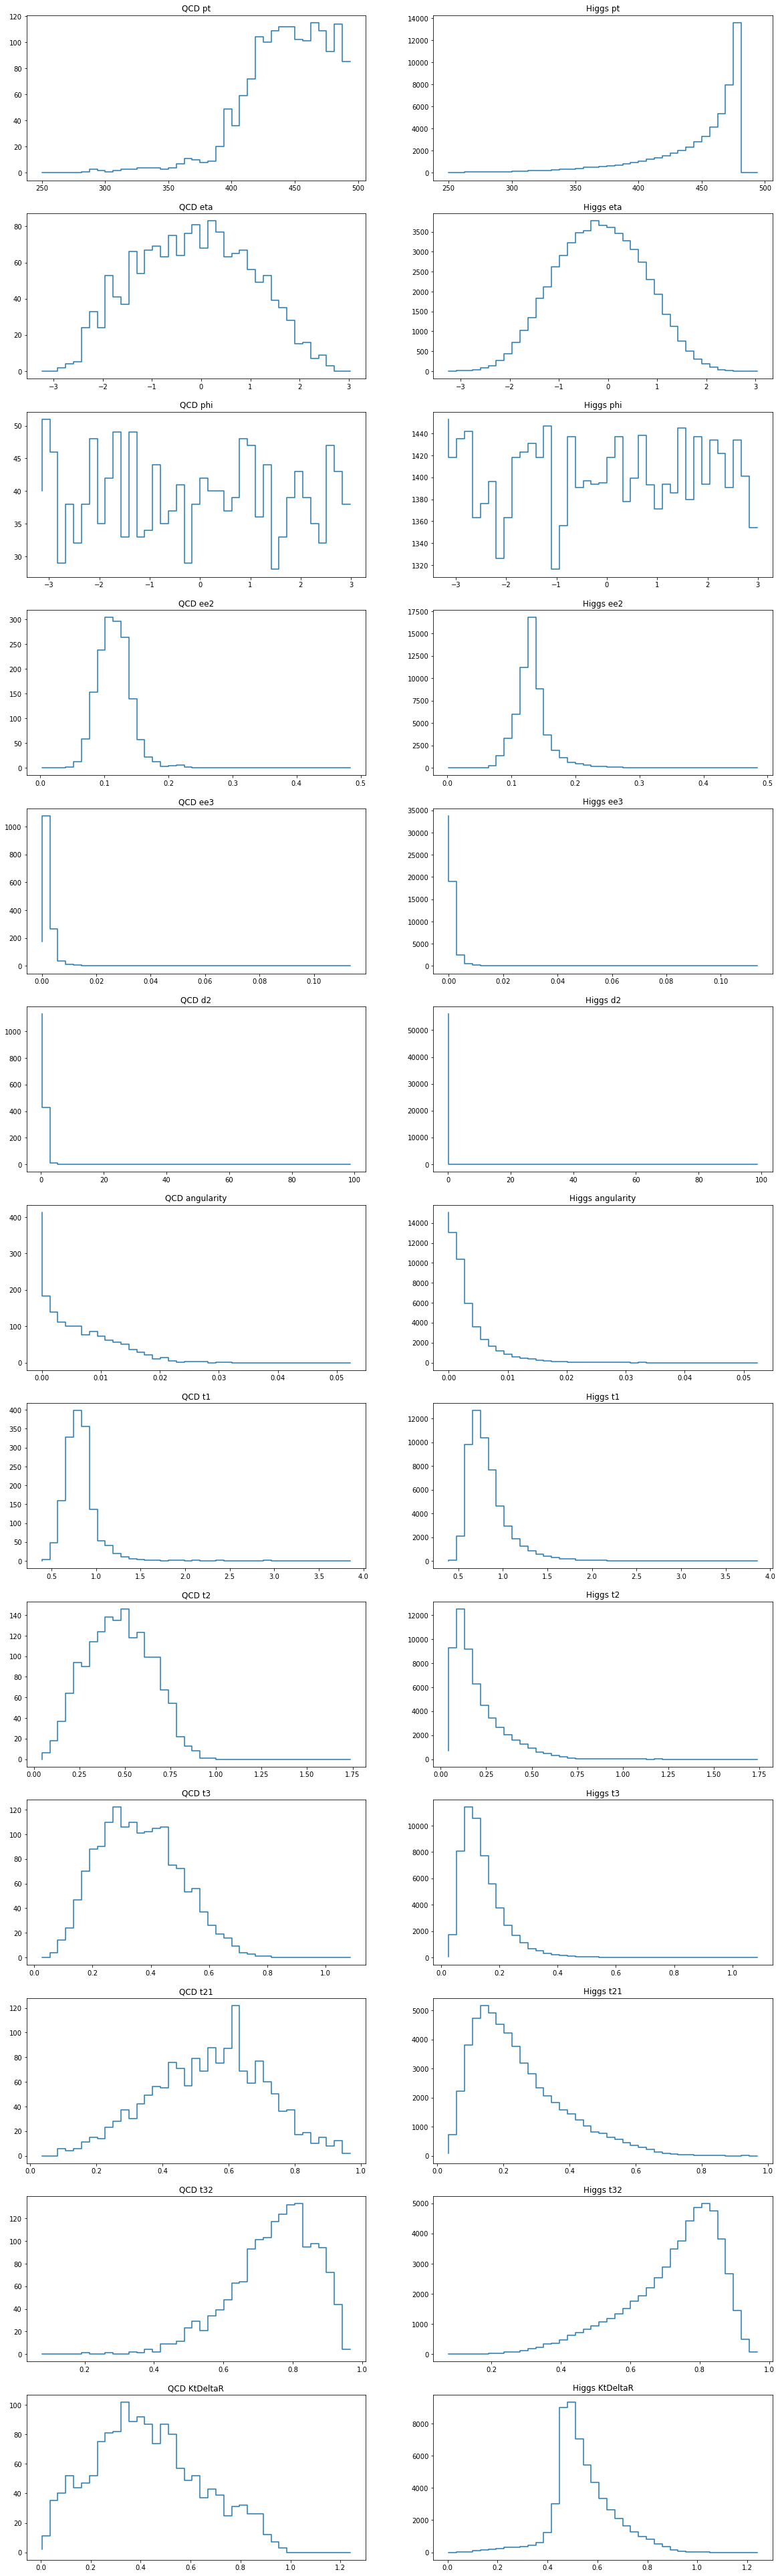

In [12]:
fig, ax = plt.subplots(13,2, figsize = (20,70))
fig2, ax2 = plt.subplots(13, 2, figsize = (20,70))

mass_lower = qcd['mass'].min()
mass_upper = qcd['mass'].max()

bin_size = 40

j = 0
for key in qcd:
    if key != "mass":

#         print(key)


        # For cuts
        lower_val = qcd[key].min()
        upper_val = qcd[key].max()

        hist_qcd = ax[j, 0].hist2d(qcd['mass'], qcd[key], bins = [95, bin_size], range = [[mass_lower, mass_upper], [lower_val, upper_val]], density = False)
        hist_higgs = ax[j, 1].hist2d(higgs['mass'], higgs[key], bins = [95, bin_size], range = [[mass_lower, mass_upper], [lower_val, upper_val]], density = False)


        qcd_slice = hist_qcd[0][35]
        higgs_slice = hist_higgs[0][35]
        
        selected_qcd = ax2[j, 0].step(hist_qcd[2][0:bin_size], qcd_slice)
        selected_higgs = ax2[j, 1].step(hist_higgs[2][0:bin_size],higgs_slice)
        ax2[j,0].set_title("QCD " + key)
        ax2[j,1].set_title("Higgs " + key)
        
        qcd_weight = (20000 / 20100) * (100000 / np.sum(qcd_slice))
        higgs_weight = (100 / 20100) * (100000 / np.sum(higgs_slice))

        
        cut_sigs = []
        for i in range(bin_size):
            n_qcd = np.sum(qcd_slice[i]) * qcd_weight
            n_higgs = np.sum(higgs_slice[i]) * higgs_weight
            sig = stats.norm.ppf(stats.poisson.cdf(n_higgs + n_qcd, n_qcd, loc = 0))
#             print(n_qcd, n_higgs, sig)
            if sig != float('inf'):
                cut_sigs.append(sig)
            elif sig == float('inf'):
                cut_sigs.append(0)

        index_max = cut_sigs.index(max(cut_sigs))
        print("Optimal cut for " + key + " is between " + str(hist_qcd[2][index_max]) + " and " + str(hist_qcd[2][index_max] + (upper_val / bin_size)) + " with an expected significance of " + str(cut_sigs[index_max]))
        print("----------------------")
        
        j = j + 1
        
print(selected_qcd)